## Задача 2. Сравнение методов классификации

**ФИО**: Степырев Даниил Федорович

**Номер группы**: 22.М05

**Выполненные пункты**:
- [ ] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [ ] Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).
- [ ] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [ ] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [ ] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [ ] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [ ] Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
- [ ] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- [ ] \* (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.
- [ ] \* (**+2 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

### Данные, на которых решается задача

В первой части задания используется датасет заболеваний сердца.

Описание датасета:
* **age** --- возраст (в годах); <br>
* **sex** --- пол (1 --- мужчина; 0 --- женщина); <br>
* **cp** --- тип боли в груди; <br>
* **trestbps** --- артериальное давление в покое (в мм рт.ст. при поступлении в стационар); <br>
* **chol** --- холестерин сыворотки в мг/дл; <br>
* **fbs** --- уровень сахара в крови (1 --- >120 мг/дл; 0 --- иначе); <br>
* **restecg** --- результаты электрокардиографии в покое; <br>
* **thalach** --- максимальная достигнутая частота сердечных сокращений; <br>
* **exang** --- стенокардия, вызванная физической нагрузкой (1 --- да; 0 --- нет); <br>
* **oldpeak** --- депрессия сегмента ST, вызванная физической нагрузкой, по сравнению с состоянием покоя; <br>
* **slope** --- наклон пикового сегмента ST при нагрузке; <br>
* **ca** --- количество крупных сосудов (0-3), окрашенных при флюороскопии; <br>
* **thal** --- 3 --- нормальный; 6 --- фиксированный дефект; 7 --- обратимый дефект; <br>
* **target** --- есть болезнь или нет (1 --- есть; 0 --- нет).

Решаем задачу классификации, предсказываем целевой признак **target** --- имеет ли пациент заболевание сердца.

### Считывание данных

Подключаем использумые библиотеки:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем обучающую выборку:

In [2]:
df = pd.read_csv('Dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Общее количество пропущенных значений:

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Разведочный анализ (EDA)

Рассмотрим, сколько различных значений принимает целевой признак:

In [4]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Построим график:

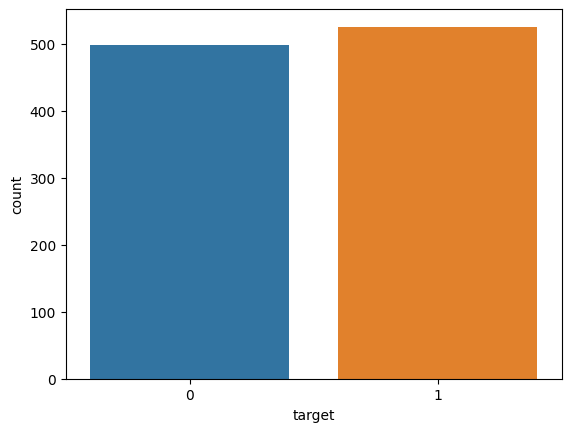

In [5]:
sns.countplot(x="target", data=df)
plt.show()

Сгруппируем все признаки по полю **target**:

In [7]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


### Признак age

Посмотрим график признака *age*:

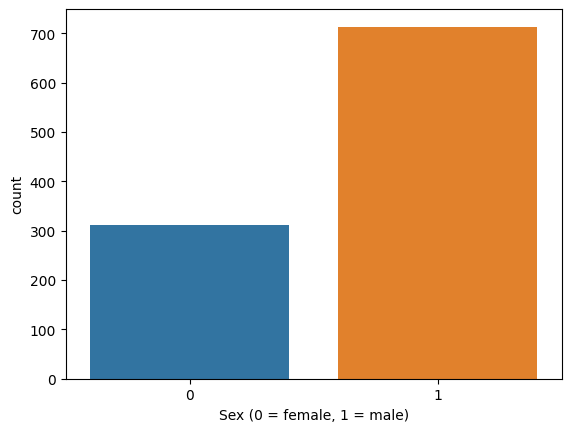

In [6]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()